# Homework Exercise from Week 3

This file re-uses a lot of the code from the in-class exercises from Week 2, so the first half of it you've already seen.  There are two exceptions:

 1. I have updated all the comments throughout the file to follow the best practices taught in [Chapter 5 of the class notes](https://nathancarter.github.io/MA346-course-notes/_build/html/chapter-5-before-and-after.html).  Specifically:
     * Before every code cell, I've included the motivation for why we're running it.
     * After every code cell, I've interpreted the output for the reader.
 2. I have added new code at the end of the file that wasn't there before.  This code is either uncommented or very poorly commented.  It's your job to:
     * Read all that code until you understand it.  (Feel free to utilize office hours, email, Teams, etc. if you need help.)
     * Add in comments that follow the best practices covered in class and summarized above.
     * Submit your work by publishing it on Deepnote and emailing me the link to the published version.

This file should be used in the same folder as [the CSV file of mortgage applications](https://nathancarter.github.io/MA346-course-notes/_static/practice-project-dataset-1.csv) discussed in [Chapter 4 of the class notes](https://nathancarter.github.io/MA346-course-notes/_build/html/chapter-4-review-of-python-and-pandas.html).

---

# HERE'S THE PART YOU'VE ALREADY SEEN:

---

We begin by loading the mortgage dataset, which also requires importing the pandas library.

In [1]:
import pandas as pd
df = pd.read_csv( 'practice-project-dataset-1.csv' )

No output from this cell means it succeeded without error.  The variable `df` now contains all the data.

But what's in the dataset?  Let's explore.

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,80545,80545,2018,5493002QI2ILHHZH8D20,31084,CA,6037.0,6.037603e+09,C,Conventional:First Lien,...,NaN,NaN,NaN,7029,96.76,69300,65,885,1363,51
1,62888,62888,2018,549300ALNLUNS3Y53T24,44060,WA,53063.0,5.306301e+10,C,Conventional:First Lien,...,NaN,NaN,NaN,7568,11.19,64000,138,2002,2338,22
2,140260,140260,2018,549300PUSSF737Y6XW86,12060,GA,13223.0,1.322312e+10,C,Conventional:First Lien,...,NaN,NaN,NaN,11924,26.72,74400,125,3082,3775,13
3,108456,108456,2018,JJKC32MCHWDI71265Z06,17900,SC,45079.0,4.507901e+10,C,Conventional:First Lien,...,NaN,NaN,NaN,6860,53.85,68800,128,1815,2465,13
4,82467,82467,2018,5493002UNUIL8WHZAD63,31140,KY,21185.0,2.118503e+10,C,Conventional:First Lien,...,NaN,NaN,NaN,4719,6.42,70400,161,1412,1616,33


The table above shows several of the columns of the dataset, but just the first five rows.  It gives us a quick peek at some of the dataset's contents.

But since we can't see all the columns, we may ask, how many columns are there?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Columns: 101 entries, Unnamed: 0 to tract_median_age_of_housing_units
dtypes: float64(31), int64(43), object(27)
memory usage: 11.7+ MB


It seems that ther are 101, and because there are so many, pandas did not give us detailed information on each one.

We care today only about investigating a few of these columns, so we will drop all the others, making our DataFrame more manageable.

In [4]:
df = df[['interest_rate','property_value','state_code','tract_minority_population_percent','derived_race','derived_sex','applicant_age']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   interest_rate                      10061 non-null  object 
 1   property_value                     12424 non-null  object 
 2   state_code                         14929 non-null  object 
 3   tract_minority_population_percent  15120 non-null  float64
 4   derived_race                       15120 non-null  object 
 5   derived_sex                        15120 non-null  object 
 6   applicant_age                      15120 non-null  object 
dtypes: float64(1), object(6)
memory usage: 827.0+ KB


Now that there are only 7 columns, the `info()` function shows us the name and type of each, as well as how many entries are null/non-null.

Because "object" is the data type pandas uses to mean "string" or "text," three of the columns in the above table have the wrong data type.  We need to convert `interest_rate` and `property_value` to a numeric type.  We'll use `float` to support missing values.  We'll return to `applicant_age` later.

If we tried to convert the `interest_rate` column to `float`, we would get an error, because it contains several instances of the word "Exempt."  We want to treat these as missing values, so we will replace them with NumPy's null value.

In [5]:
import numpy as np
df['interest_rate'] = df['interest_rate'].replace( 'Exempt', np.nan )

No output indicates no errors, or success.

We can therefore convert the column to the correct type.

In [6]:
df['interest_rate'] = df['interest_rate'].astype( float )

Again, no output means nothing went wrong.  We then repeat the process with the `property_value` column as well.

In [7]:
df['property_value'] = df['property_value'].replace( 'Exempt', np.nan )
df['property_value'] = df['property_value'].astype( float )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   interest_rate                      9660 non-null   float64
 1   property_value                     12024 non-null  float64
 2   state_code                         14929 non-null  object 
 3   tract_minority_population_percent  15120 non-null  float64
 4   derived_race                       15120 non-null  object 
 5   derived_sex                        15120 non-null  object 
 6   applicant_age                      15120 non-null  object 
dtypes: float64(3), object(4)
memory usage: 827.0+ KB


The DataFrame's info table now shows that we've successfully converted those two columns (note their `float64` data type in the right column).

If we tried to do the same to the `applicant_age` column, it would fail, because the ages aren't actually numbers.  We can see their values with the following code.

In [8]:
df['applicant_age'].value_counts()

35-44    3144
45-54    3033
25-34    2553
55-64    2483
8888     1489
65-74    1454
>74       567
<25       397
Name: applicant_age, dtype: int64

So `applicant_age` is a categorical column, because ages have been broken into the eight categories you see above.  Like `derived_race` and `derived_sex`, it should have data type categorical.

We convert each of those columns as follows.

In [9]:
df['derived_race'] = df['derived_race'].astype( 'category' )
df['derived_sex'] = df['derived_sex'].astype( 'category' )
df['applicant_age'] = df['applicant_age'].astype( 'category' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   interest_rate                      9660 non-null   float64 
 1   property_value                     12024 non-null  float64 
 2   state_code                         14929 non-null  object  
 3   tract_minority_population_percent  15120 non-null  float64 
 4   derived_race                       15120 non-null  category
 5   derived_sex                        15120 non-null  category
 6   applicant_age                      15120 non-null  category
dtypes: category(3), float64(3), object(1)
memory usage: 517.9+ KB


The info table now shows that each column has the correct data type.

---

# YOUR WORK BEGINS HERE:

---

In [10]:
lower_prices = df[df['property_value'] < 500000]
high_minority = lower_prices[lower_prices['tract_minority_population_percent'] > 75]
low_minority = lower_prices[lower_prices['tract_minority_population_percent'] < 25]

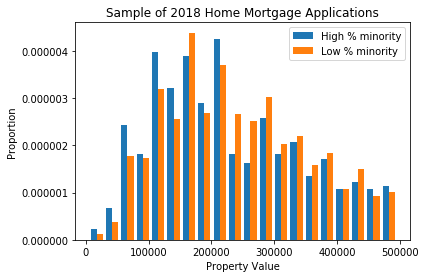

In [11]:
import matplotlib.pyplot as plt
plt.hist( [ high_minority['property_value'], low_minority['property_value'] ],
          bins=20, density=True )
plt.legend( [ 'High % minority', 'Low % minority' ] )
plt.title( 'Sample of 2018 Home Mortgage Applications' )
plt.xlabel( 'Property Value' )
plt.ylabel( 'Proportion' )
plt.show()

In [14]:
high_minority['property_value'].mean(), low_minority['property_value'].mean()

(229579.64601769912, 240573.24840764332)

Testing null hypothesis $H_0$ = the mean property value is the same for high or low % minority tracts

In [13]:
from scipy import stats
alpha = 0.05
statistic, pvalue = stats.ttest_ind( high_minority['property_value'],
                                     low_minority['property_value'],
                                     equal_var=False )
pvalue < alpha # reject H_0?

True